# Problem statemnt 

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

# Import required libraries

In [1]:
# importing all libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# importing warnings to avoid warnings

import warnings
warnings.filterwarnings("ignore")

# Calling the dataset 

In [2]:
# importing dataset

df = pd.read_csv("insurence_claim.csv")
pd.set_option("display.max_columns",None)  #to show all columns
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                       5.0                          1.0             YES   
1                       8.0                          1.0               ?   
2                       7.0                          3.0              NO   
3                       5.0                          1.0               ?   
4                      20.0                          1.0              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0              1.0        2.0                     YES             71610.0   
1              0.0        0.0                       ?              5070.0   
2              2.0        3.0                      NO             34650.0   
3              1.0        2.0                      NO             63400.0   
4              0.0        1.0                      NO              6500.0   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0        6510.0         13020.0        52080.0       Saab        92x   
1         780.0           780.0         3510.0   Mercedes       E400   
2        7700.0          3850.0        23100.0      Dodge        RAM   
3        6340.0          6340.0        50720.0  Chevrolet      Tahoe   
4        1300.0           650

in this dataset , we can see the our target columns is Farud_reported. and it is the case of Classification Problem

# EDA

In [3]:
# checking the shape of dateset

df.shape

(1000, 40)

In [4]:
# checking the columns of dataset

df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
# checking the types of dataset

df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

here we can see the dataeset are present in the from of integer, and object and float

In [6]:
# checking the information of dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

here we can see float value is 11 , and interger is 8, object is 21.

In [7]:
# checking the unique value

df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

here we can see two columns is having unique and _c39 columns has not any value

In [8]:
# dropping unique columns and and _c39 columns

df = df.drop(["_c39"],axis = 1)
df = df.drop(["policy_number"],axis = 1)
df = df.drop(["incident_location"],axis = 1)

In [9]:
# rechecking the dataset after dropping

df.nunique()

months_as_customer             391
age                             46
policy_bind_date               951
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_availa

In [10]:
# checking the null values

df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       1
number_of_vehicles_involved    1
property_damage                1
bodily_injuries                1
witnesses                      1
police_report_available        1
total_claim_amount             1
injury_cla

Here we can see there is some null values in columns

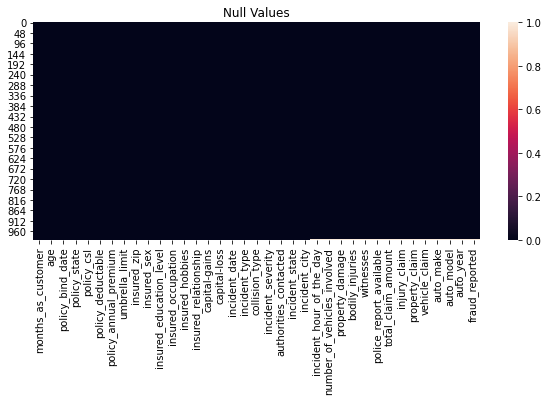

In [11]:
#Visualizeing null values

plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# IMptutiuon technique to remove null values

In [12]:
df["incident_hour_of_the_day"] = df["incident_hour_of_the_day"].fillna(df["incident_hour_of_the_day"].mode()[0])
df["number_of_vehicles_involved"] = df["number_of_vehicles_involved"].fillna(df["number_of_vehicles_involved"].mode()[0])
df["property_damage"] = df["property_damage"].fillna(df["property_damage"].mode()[0])
df["bodily_injuries"] = df["bodily_injuries"].fillna(df["bodily_injuries"].mode()[0])
df["witnesses"] = df["witnesses"].fillna(df["witnesses"].mode()[0])
df["police_report_available"] = df["police_report_available"].fillna(df["police_report_available"].mode()[0])
df["total_claim_amount"] = df["total_claim_amount"].fillna(df["total_claim_amount"].mode()[0])
df["injury_claim"] = df["injury_claim"].fillna(df["injury_claim"].mode()[0])
df["property_claim"] = df["property_claim"].fillna(df["property_claim"].mode()[0])
df["vehicle_claim"] = df["vehicle_claim"].fillna(df["vehicle_claim"].mode()[0])
df["auto_make"] = df["auto_make"].fillna(df["auto_make"].mode()[0])
df["auto_model"] = df["auto_model"].fillna(df["auto_model"].mode()[0])
df["auto_year"] = df["auto_year"].fillna(df["auto_year"].mode()[0])
df["fraud_reported"] = df["fraud_reported"].fillna(df["fraud_reported"].mode()[0])

In [13]:
# checking null values after null values out

df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

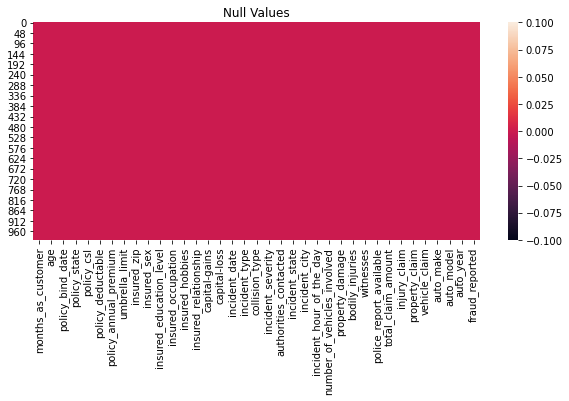

In [14]:
# reVisualizeing null values

plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [15]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.

for i in df.columns:
        print(df[i].value_counts())

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
05-08-1992    3
01-01-2006    3
28-04-1992    3
05-07-2014    2
07-11-1997    2
             ..
04-03-2014    1
04-04-1992    1
01-04-1994    1
22-09-2002    1
11-09-2004    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
1000    351
500     342
2000    307
Name: p

By looking into the value counts of each column i can say that there is 80% zeros in umbrella_limit, 50% zeros in capital-gains and 47.5% zeros in capital-loss so i have to replace these zeros or else they will create skewness in data.But zeros in capital-gains and capital loss has some meaning so let me keep those zeros as it is but let me drop umbrella_limit column since this column has 80% zeros which is not acceptable.

In [16]:
#Droping umbrella_limit column having 80% zeros

df=df.drop(["umbrella_limit"],axis=1)

In [17]:
#Droping insured_zip column 
df = df.drop(["insured_zip"],axis=1)

here we can see , we are dropping our columns because it has 995 intries

# Feature extraction:

In [18]:
#Converting object data type to datetime 

df['policy_bind_date'] =  pd.to_datetime(df['policy_bind_date'])
df['incident_date'] =  pd.to_datetime(df['incident_date'])

In [19]:
#Droping column after extraction
df = df.drop(["policy_csl"],axis=1)
df = df.drop(["auto_year"],axis=1)

In [20]:
#Checking the data types of all columns again
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_deductable                       int64
policy_annual_premium                 float64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                          object
incident_hour_of_the_day              float64
number_of_vehicles_involved       

In [21]:
#Converting object data type to datetime 
df['policy_bind_date'] =  pd.to_datetime(df['policy_bind_date'])
df['incident_date'] =  pd.to_datetime(df['incident_date'])

In [22]:
#Droping policy_bind_date column after extraction
df = df.drop(["policy_bind_date"],axis=1)

In [23]:
#Droping incident_date column after extraction
df = df.drop(["incident_date"],axis=1)

In [24]:
#Checking the value count agian

for i in df.columns:
        print(df[i].value_counts())

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
1215.36    2
1374.22    2
1389.13    2
1281.25    2
1074.07    2
          ..
1185.44    1
1243.84    1
1270.02    1
1023.11    1
1337.56    1
Name: policy_annual_premium, Length: 991, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             1

In [25]:
#Lets see which columns contains '?'

df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [26]:
 # we will fill the '?' values with this mode value

df["collision_type"].mode() 

0    Rear Collision
dtype: object

In [27]:
#Replacing '?' with mode value

df['collision_type'] = df.collision_type.str.replace('?', 'Rear Collision')

In [28]:
#Checking the value counts of property_damage column

df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [29]:
#Replacing '?' with mode value
df['property_damage'] = df.property_damage.str.replace('?', 'NO')

In [30]:
#Checking the value counts of police_report_available column
df.police_report_available.value_counts()

NO     344
?      342
YES    314
Name: police_report_available, dtype: int64

In [31]:
#Replacing '?' with mode value

df['police_report'] = df.property_damage.str.replace('?', 'NO')

In [32]:
#Checking shape now

df.shape

(1000, 32)

In [33]:
#Checking description of data set
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  capital-gains   capital-loss  \
count            1000.000000    1000.000000    1000.000000   
mean             1256.406150   25126.100000  -26793.700000   
std               244.167395   27872.187708   28104.096686   
min               433.330000       0.000000 -111100.000000   
25%              1089.607500       0.000000  -51500.000000   
50%              1257.200000       0.000000  -23250.000000   
75%              1415.695000   51025.000000       0.000000   
max              2047.590000  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.655000                      1.83900         0.992000   
std                    6.951136                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000         1000.000000   1000.000000     1000.000000   
mean      1.485000        52816.280000   7432.960000     7398.650000   
std       1.110409        26359.141756   4881.631342     4826.050501   
min       0.000000          100.000000      0.000000        0.000000   
25%       1.000000        41962.500000   4295.000000     4445.000000   
50%       1.000000        58150.000000   6775.000000     6750.000000   
75%       2.000000        70592.500000  11305.000000    10885.000000   
max       3.000000       114920.000000  21450.000000    23670.000000   

       vehicle_claim  
count    1000.000000  
mean    37930.310000  
std     18883.832968  
min        70.000000  
25%     30292.500000  
50%     42100.000000  
75%     50822.500000  
max     79560.000000

Describe method will show summary only for numerical columns by default.This will help us to do analysis on outliers/skewness and checking whether null values present in dataset or not by looking into count.

# Visualization 


# Univariate Analysis

In [34]:
# Separating categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'police_report']


In [35]:
# Separating numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


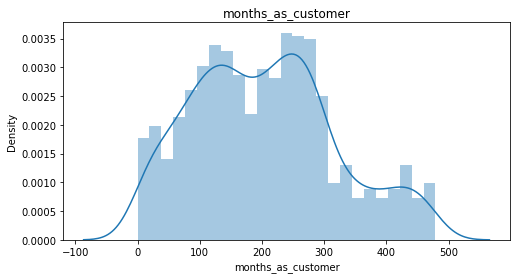

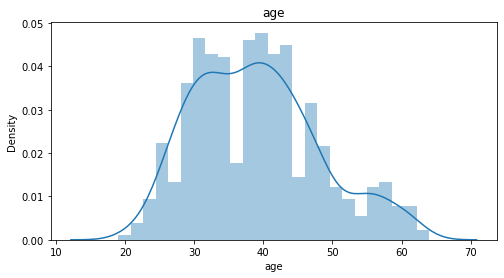

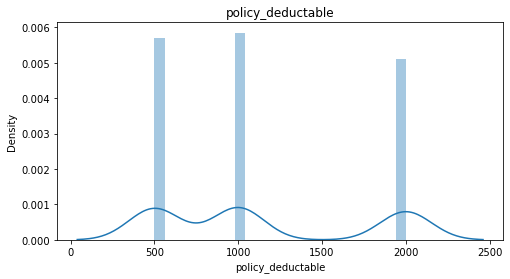

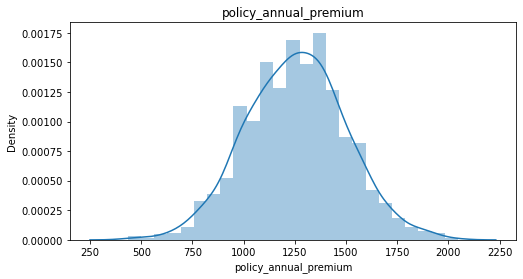

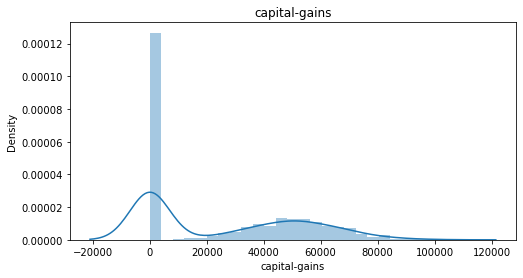

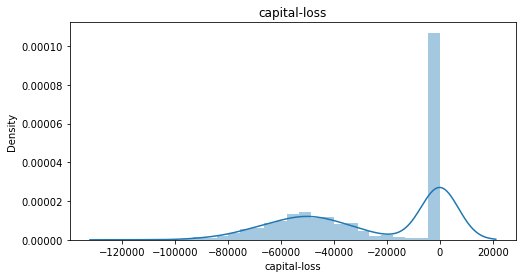

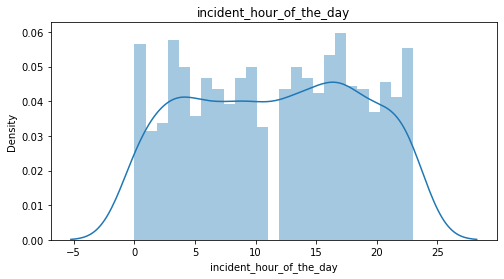

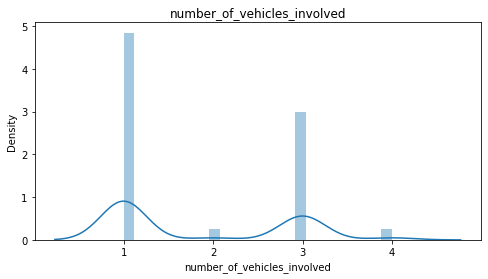

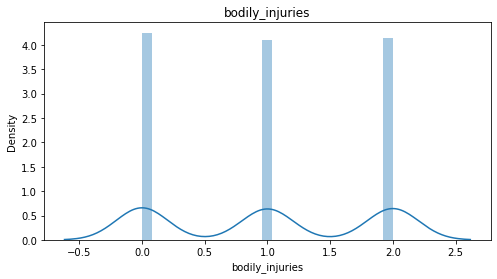

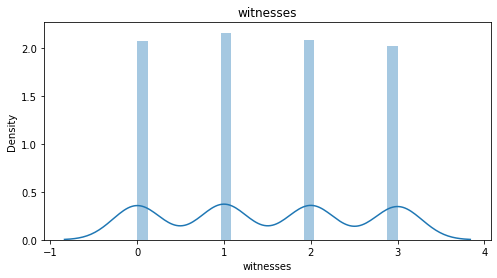

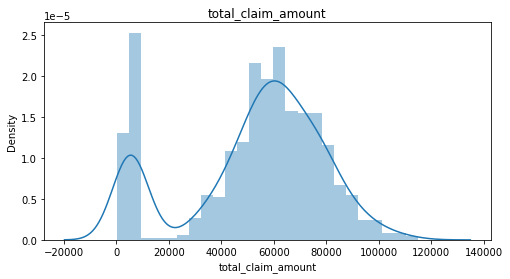

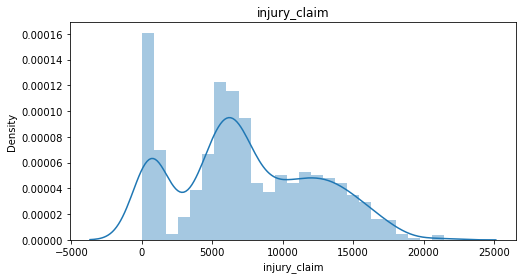

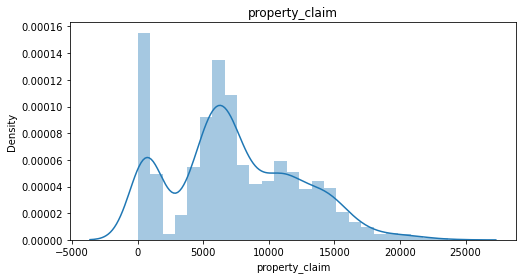

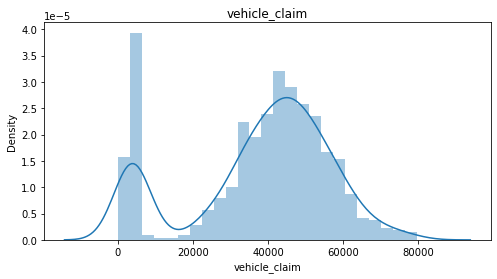

In [36]:
#Distribution plot for all numerical columns

for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 25)
    plt.title(i)
    plt.show()

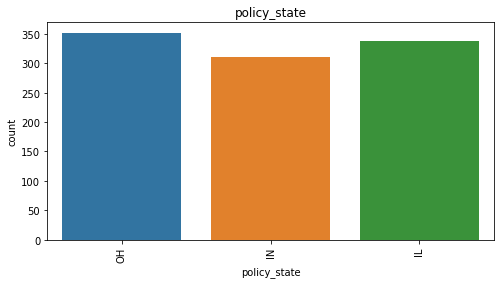

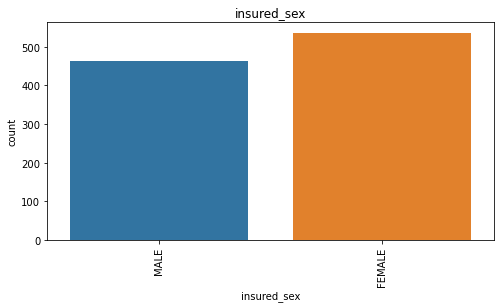

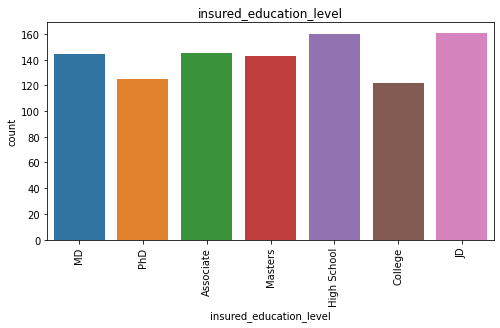

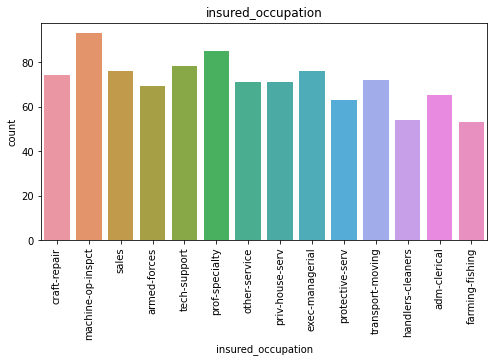

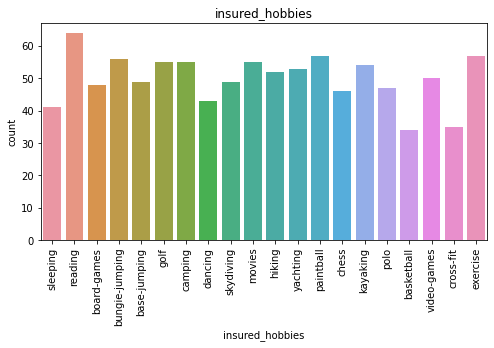

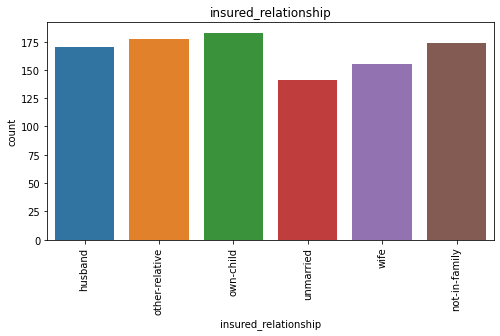

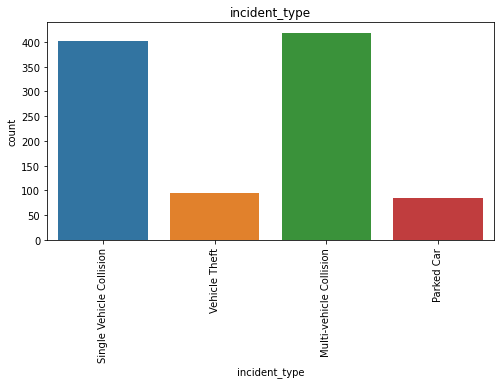

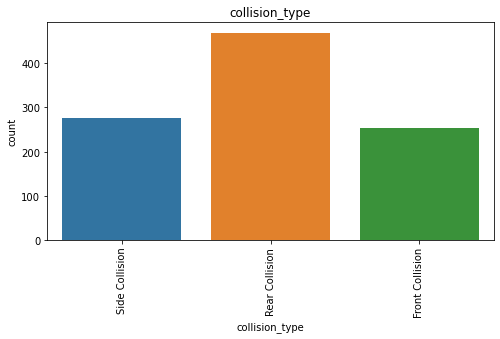

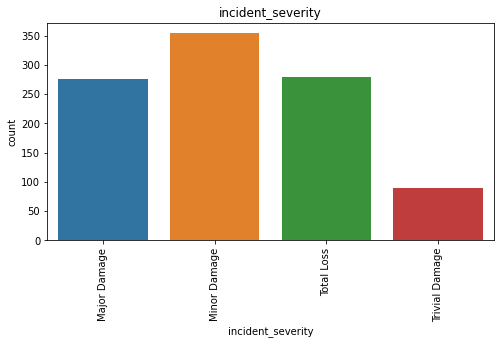

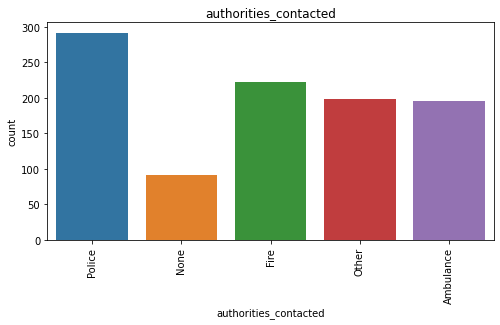

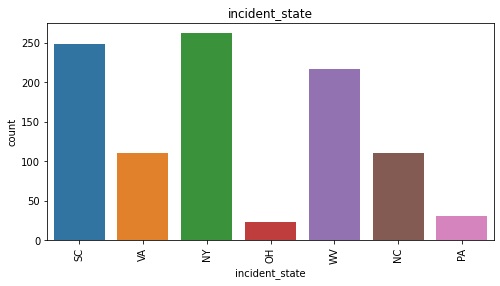

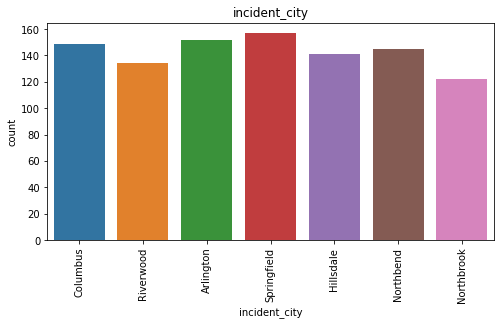

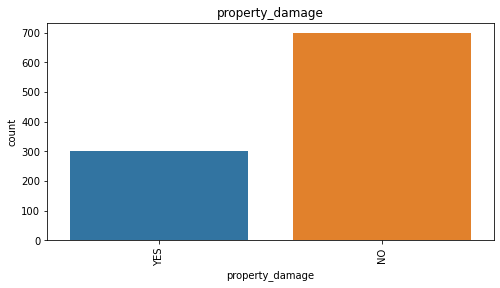

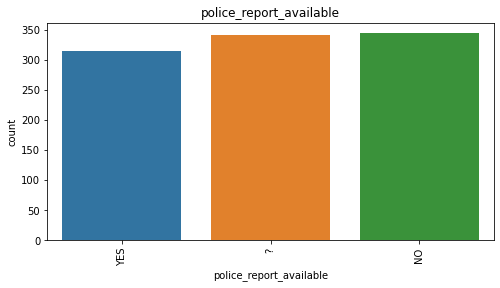

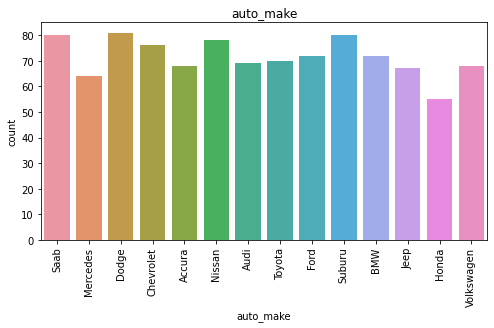

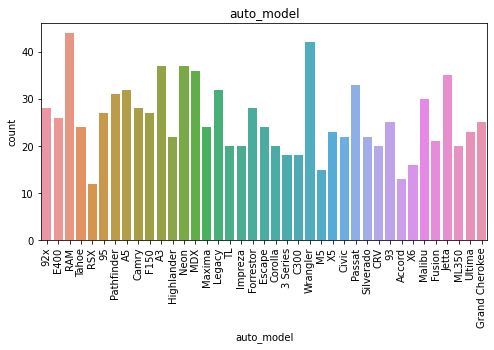

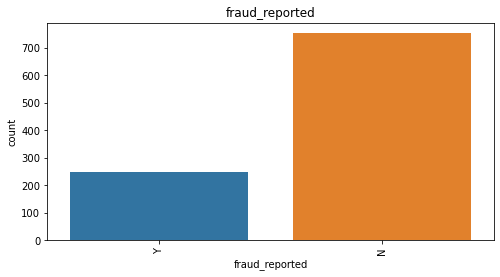

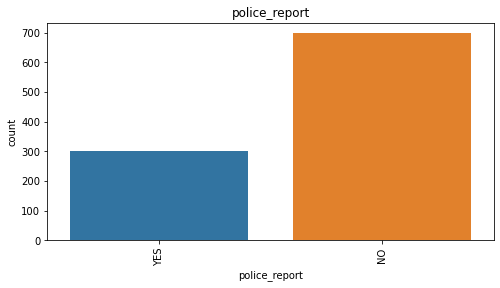

In [37]:
#Distribution plot for all categorical columns

for i in df[categorical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

OH policy_state count is high.

Female insured are more in number.

JD High school qualified insured are more in number.

Machine-op-inspct are high in number.

Most of the insured persons are having reading as there hobbies.

own-child has maximum count in insured_relationship.

Multi-vehicle-collision and single-vehicle-collision are more in number.

Rather than front and side collision Rear Collision has maximum count.

Minor damage has maximum count compared to Trivial damage.

Police are the mejority authorities contacted.

In NY state most of the cases are registered.

In all the cities the insuered climb are almost same.

There is very less count for property damage.

Very less cases have police_report_available.

Both 250 and 100 have same count in cls_per_person.

Both 500 and 300 have same count in cls_per_accident.

# Bivariate Analysis :

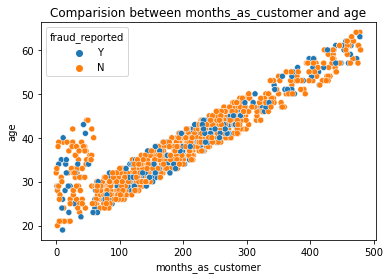

In [46]:
#Comparision between features using scatter plot

plt.subplot(1,1,1)
plt.title('Comparision between months_as_customer and age')
sns.scatterplot(df['months_as_customer'],df['age'],hue=df['fraud_reported']);

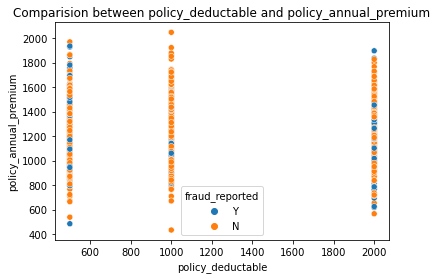

In [48]:
#Comparision between features using scatter plot

plt.subplot(1,1,1)
plt.title('Comparision between policy_deductable and policy_annual_premium')
sns.scatterplot(df['policy_deductable'],df['policy_annual_premium'],hue=df['fraud_reported']);

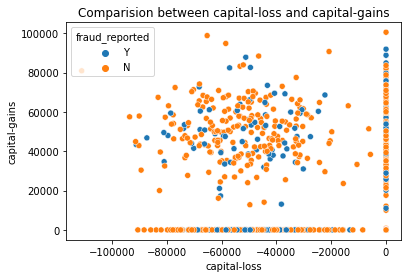

In [49]:
#sctter ploting between two fetures

plt.subplot(1,1,1)
plt.title('Comparision between capital-loss and capital-gains')
sns.scatterplot(df['capital-loss'],df['capital-gains'],hue=df['fraud_reported']);


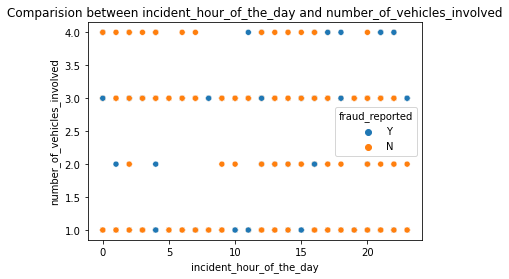

In [50]:
# scttering plot between two features

plt.subplot(1,1,1)
plt.title('Comparision between incident_hour_of_the_day and number_of_vehicles_involved')
sns.scatterplot(df['incident_hour_of_the_day'],df['number_of_vehicles_involved'],hue=df['fraud_reported']);

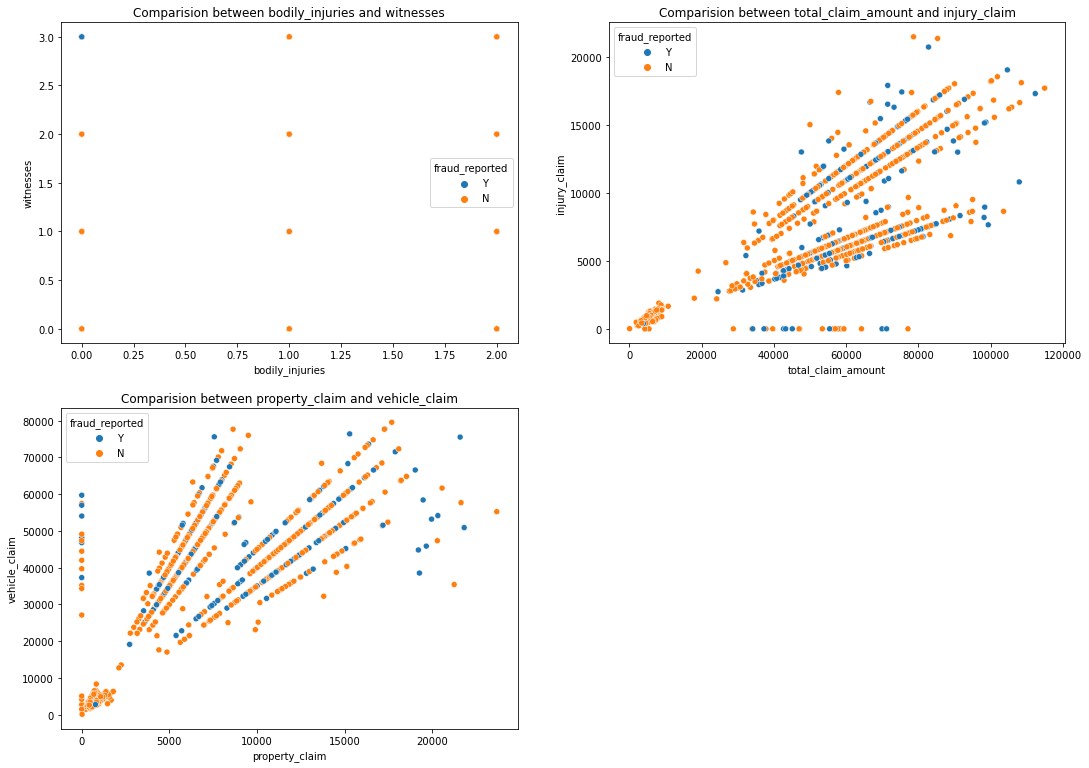

In [54]:
#Comparision between features using scatter plot
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between bodily_injuries and witnesses')
sns.scatterplot(df['bodily_injuries'],df['witnesses'],hue=df['fraud_reported']);

plt.subplot(2,2,2)
plt.title('Comparision between total_claim_amount and injury_claim')
sns.scatterplot(df['total_claim_amount'],df['injury_claim'],hue=df['fraud_reported']);

plt.subplot(2,2,3)
plt.title('Comparision between property_claim and vehicle_claim')
sns.scatterplot(df['property_claim'],df['vehicle_claim'],hue=df['fraud_reported']);

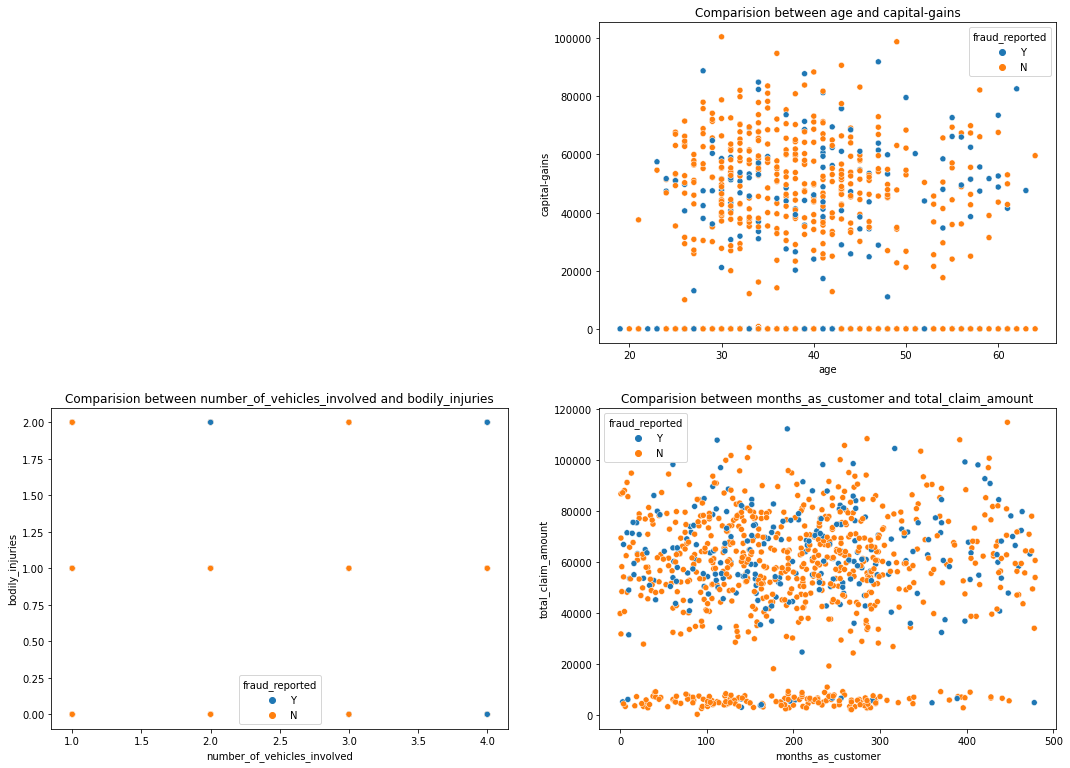

In [57]:
#Comparision between features using scatter plot
plt.figure(figsize=[18,13])

plt.subplot(2,2,2)
plt.title('Comparision between age and capital-gains')
sns.scatterplot(df['age'],df['capital-gains'],hue=df['fraud_reported']);

plt.subplot(2,2,3)
plt.title('Comparision between number_of_vehicles_involved and bodily_injuries')
sns.scatterplot(df['number_of_vehicles_involved'],df['bodily_injuries'],hue=df['fraud_reported']);

plt.subplot(2,2,4)
plt.title('Comparision between months_as_customer and total_claim_amount')
sns.scatterplot(df['months_as_customer'],df['total_claim_amount'],hue=df['fraud_reported']);

For the age range of 25-45 the capital-gains is high.
In 3rd plot i can say there very less number of fraud_detected.
In 4th plot the points are dence near 0 claim amount and for the range of 50-300 in month_as_customer the total_claim_amount is high.

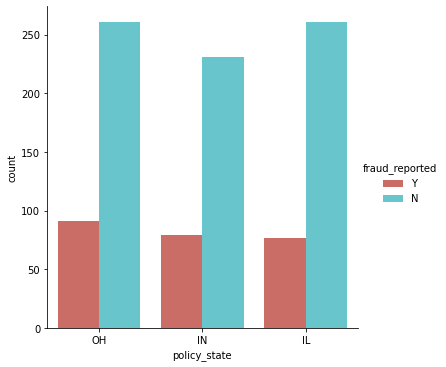

In [58]:
#Factor plot for policy_state
sns.factorplot('policy_state',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=0);

Policy_state fraud is very less

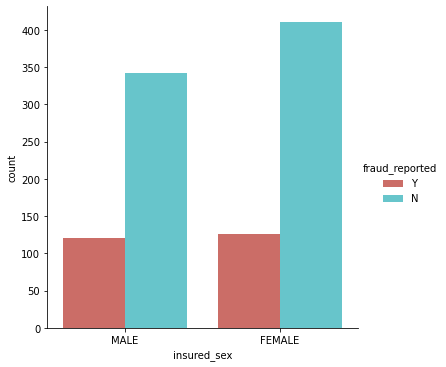

In [59]:
#Factor plot for insured_sex

sns.factorplot('insured_sex',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=0);

Fraud detection is less in both insured_sex but fraud not reported is high for females.Which means females are very ethical in climbing insurance.

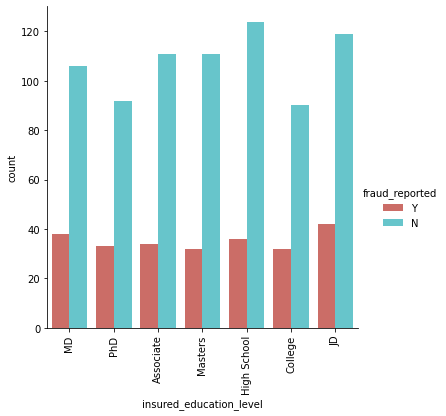

In [61]:
#Factor plot for insured_education_level
sns.factorplot('insured_education_level',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=90);

here we can see no fraud is less with high school

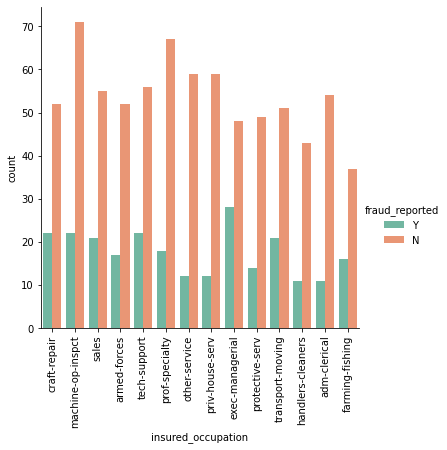

In [62]:
#Factor plot for insured_occupation

sns.factorplot('insured_occupation',kind='count',data=df,hue='fraud_reported',palette="Set2")
plt.xticks(rotation=90);

In all the insured occations the fraud detected is less.

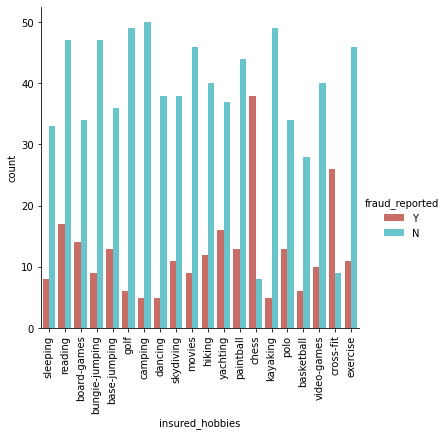

In [65]:
#Factor plot for insured_hobbies

sns.factorplot('insured_hobbies',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=90);

customers with chess and cross-fit has maximum number of fraud predicted.These gaming minded people makes there mind to fraud insurance companines.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

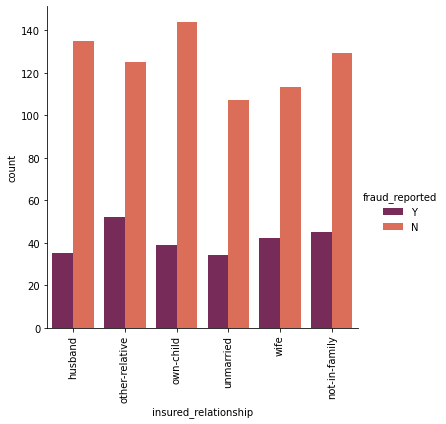

In [66]:
#Factor plot for insured_relationship

sns.factorplot('insured_relationship',kind='count',data=df,hue='fraud_reported',palette="rocket")
plt.xticks(rotation=90)

unmarried peple has very less fraud report

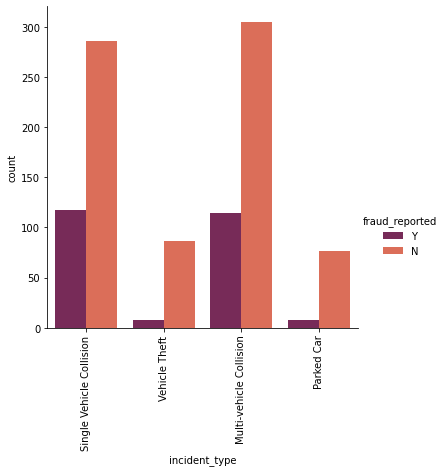

In [67]:
#Factor plot for incident_type

sns.factorplot('incident_type',kind='count',data=df,hue='fraud_reported',palette="rocket")
plt.xticks(rotation=90);

multi vechile collosion and single vehicle has high value

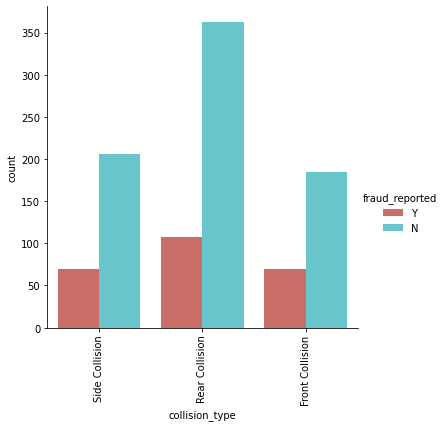

In [68]:
#Factor plot for collision_type

sns.factorplot('collision_type',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=90);

rear collosion has very high value as compare to other

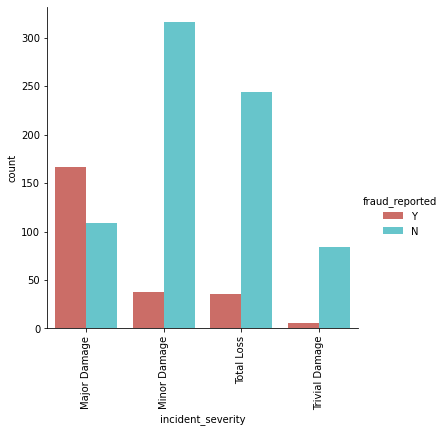

In [69]:
#Factor plot for incident_severity

sns.factorplot('incident_severity',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=90);

no minor damage has high value 

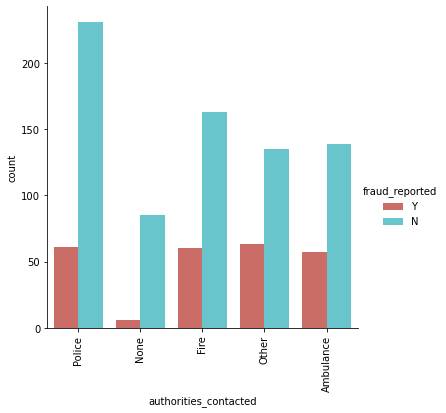

In [70]:
#Factor plot for authorities_contacted

sns.factorplot('authorities_contacted',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=90);

ploicec has connect high fraud

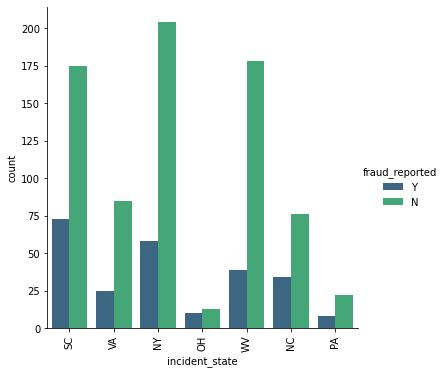

In [71]:
#Factor plot for incident_state
sns.factorplot('incident_state',kind='count',data=df,hue='fraud_reported',palette="viridis")
plt.xticks(rotation=90);

ny has not high reted fraud case

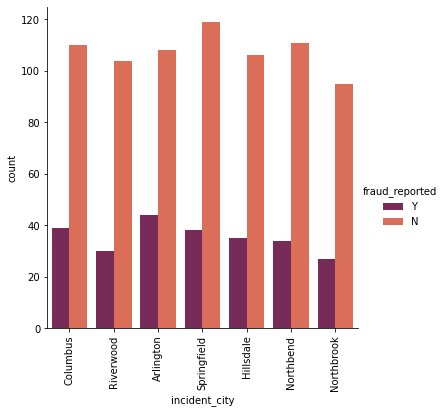

In [72]:
#Factor plot for incident_city

sns.factorplot('incident_city',kind='count',data=df,hue='fraud_reported',palette="rocket")
plt.xticks(rotation=90);

arlington has high value with case fraud

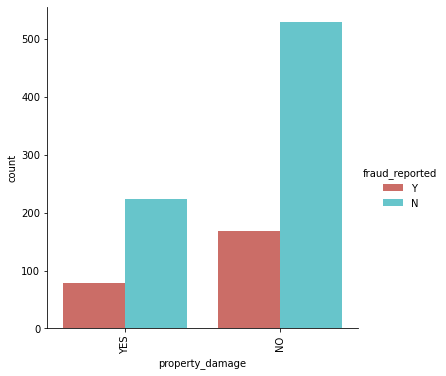

In [73]:
#Factor plot for property_damage

sns.factorplot('property_damage',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=90);

there is not so much property damage fraud_reported

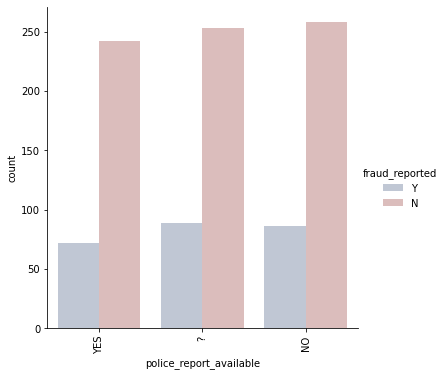

In [74]:
#Factor plot for police_report_available
sns.factorplot('police_report_available',kind='count',data=df,hue='fraud_reported',palette="vlag")
plt.xticks(rotation=90);

there is not  police report with the fraud_report

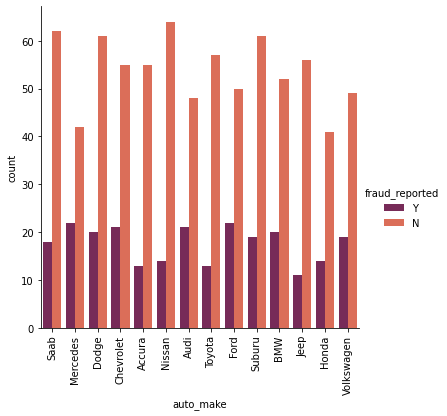

In [75]:
#Factor plot for auto_make

sns.factorplot('auto_make',kind='count',data=df,hue='fraud_reported',palette="rocket")
plt.xticks(rotation=90);

In all auto_make case there are fraud reports.

# MultiVariate Analysis:

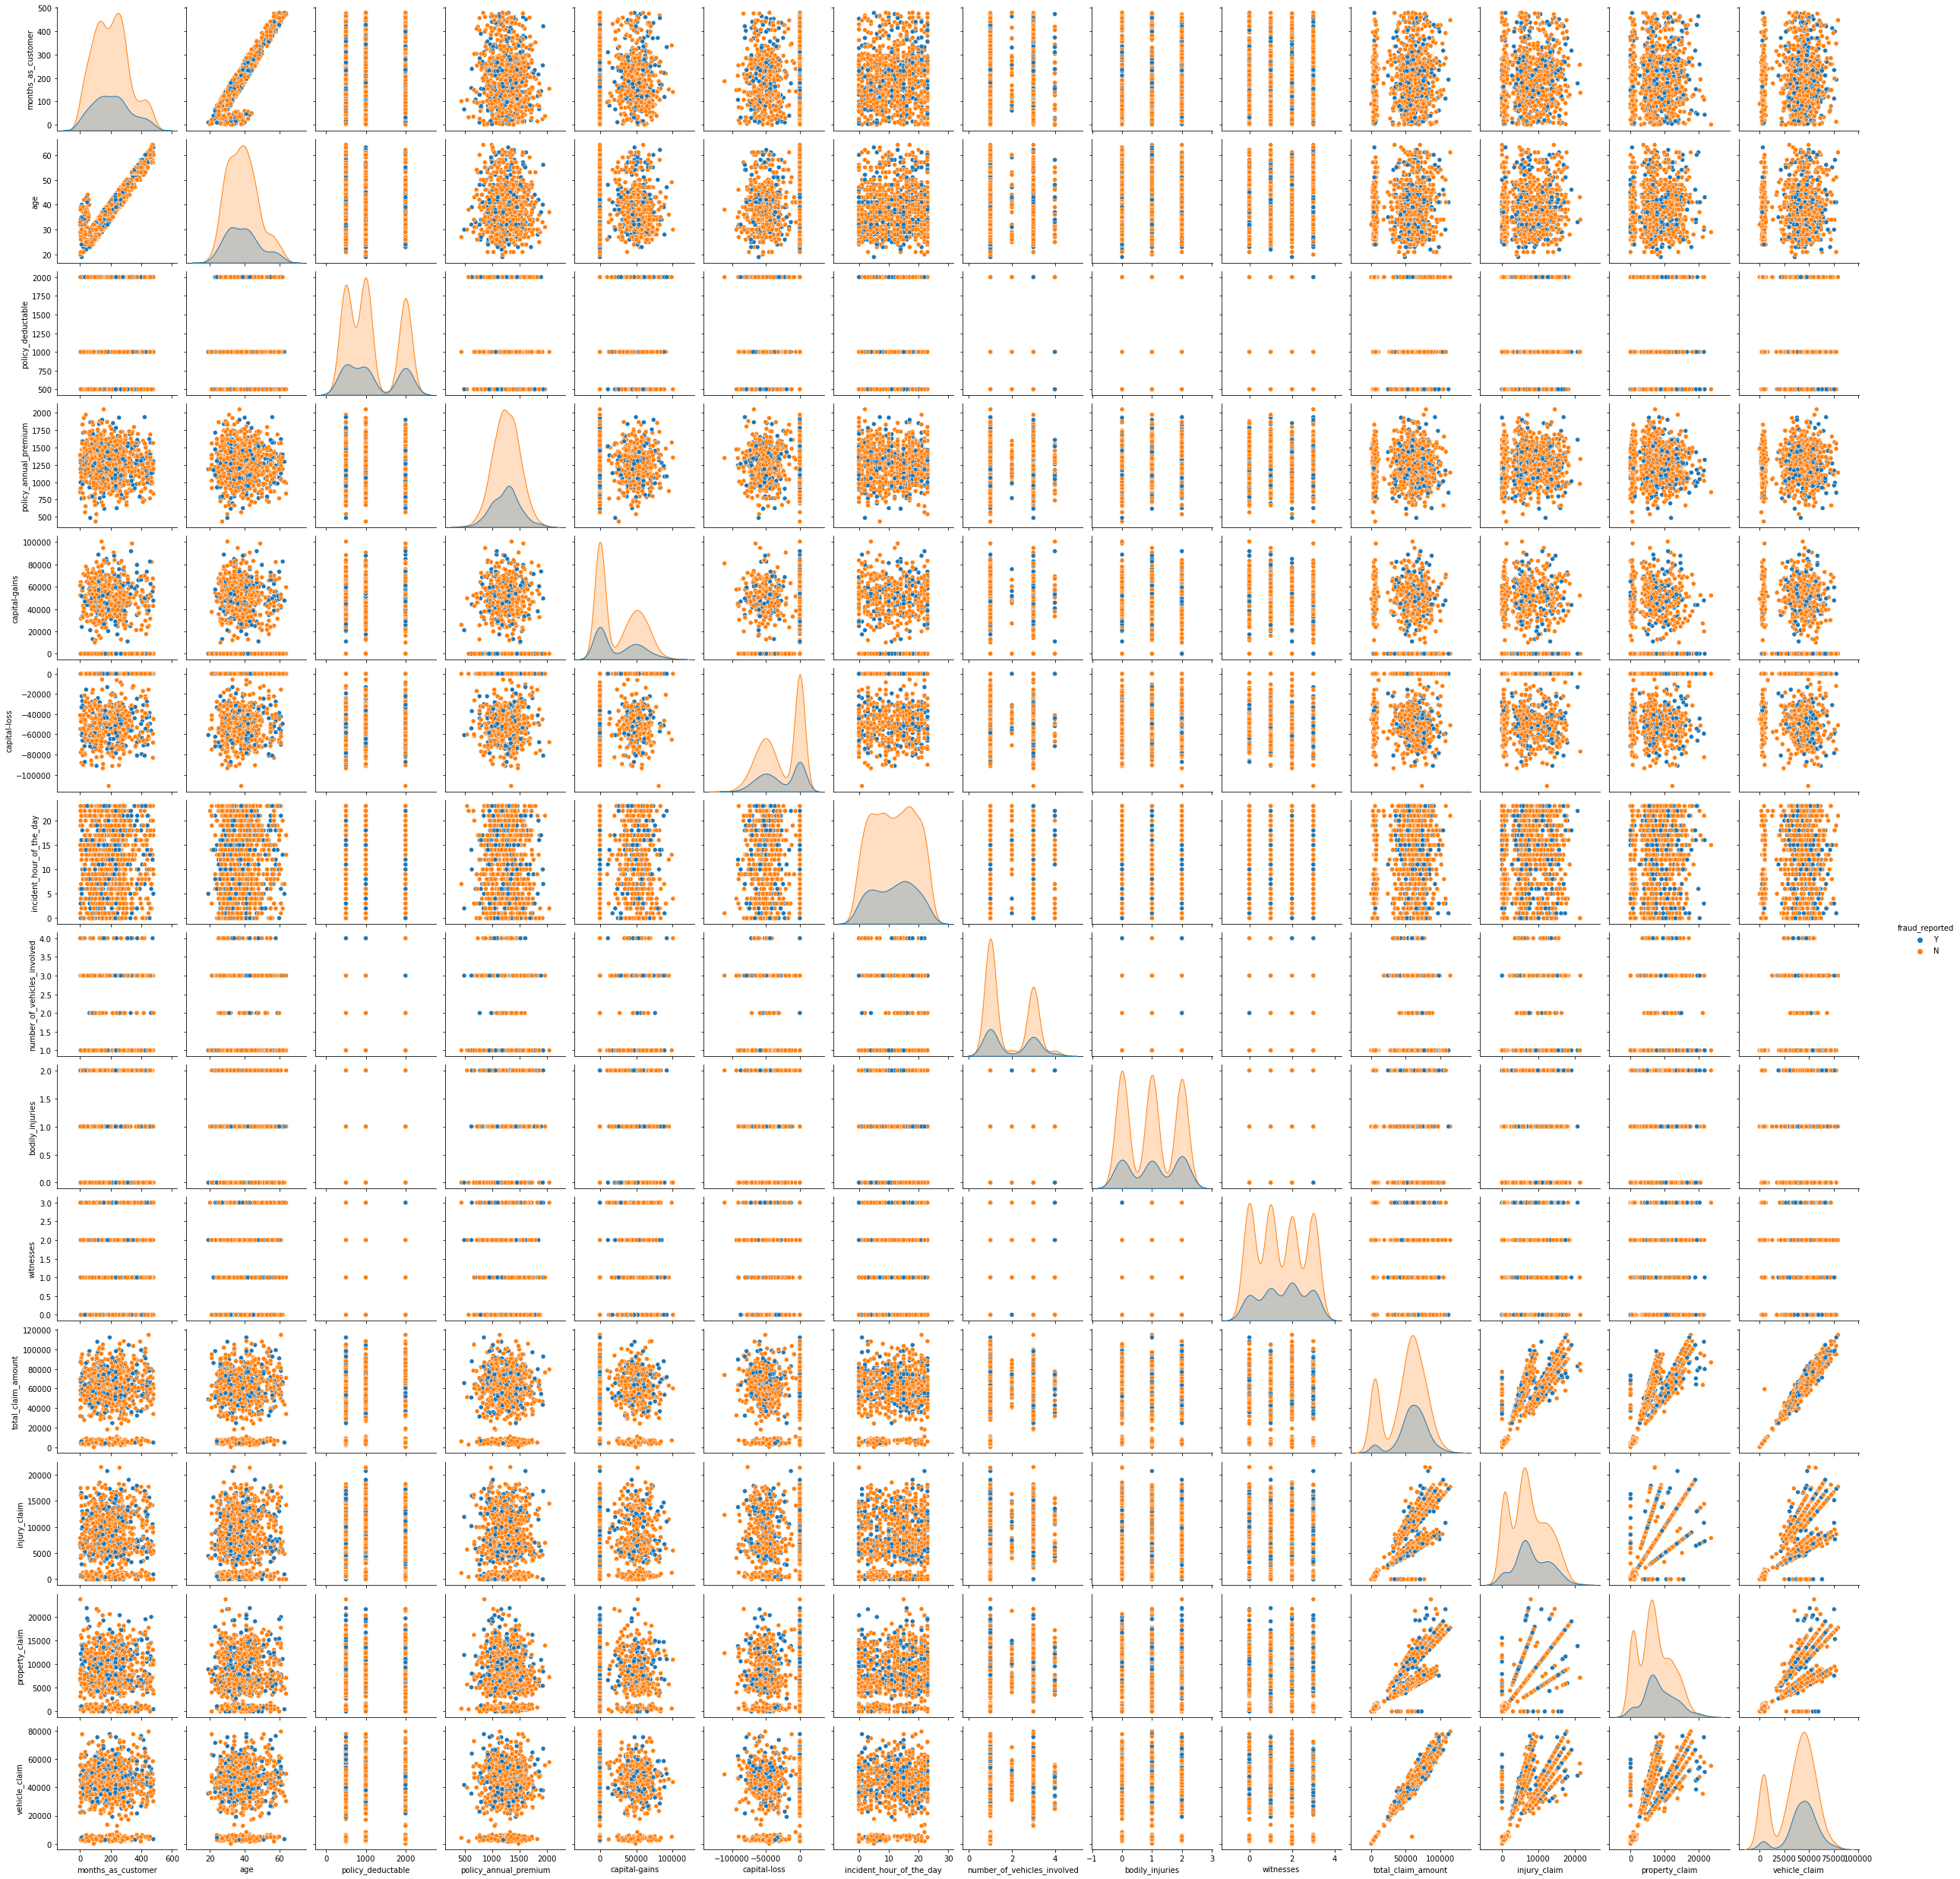

In [77]:
#pair ploting for df

sns.pairplot(df,hue="fraud_reported")

# Cheking for Outliers:

<AxesSubplot:>

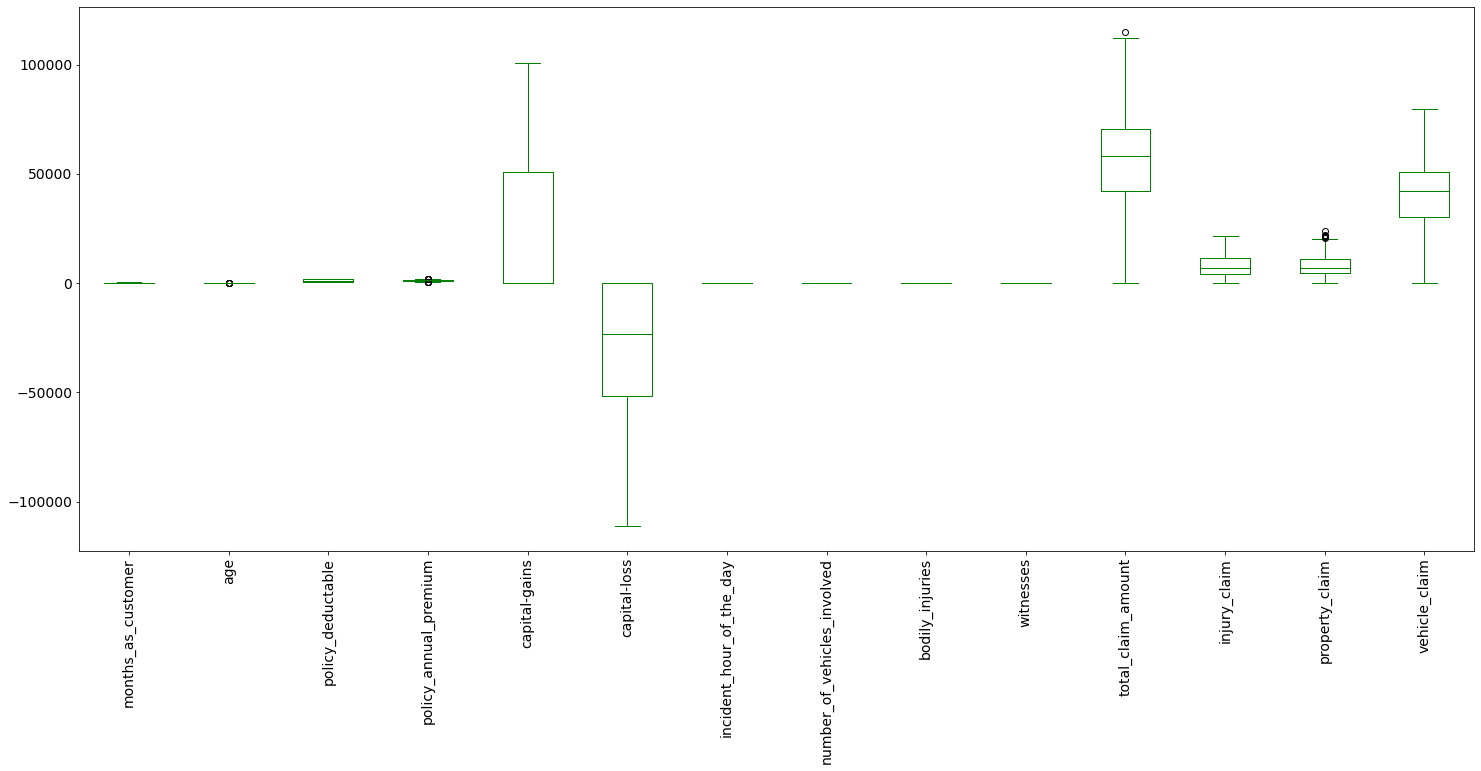

In [78]:
#Checking for outliers

df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,10),color='g')

outliers is in age , policy_annual_premium , Property_claim, and also in total_claim_amount in columns

# Removing outliers :

In [79]:
# using Z score method

#Features having outliers
features=df[['age','policy_annual_premium','total_claim_amount','property_claim']]

In [80]:
from scipy.stats import zscore

z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

months_as_customer  age policy_state  policy_deductable  \
0                   328   48           OH               1000   
1                   228   42           IN               2000   
2                   134   29           OH               2000   
3                   256   41           IL               2000   
4                   228   44           IL               1000   
..                  ...  ...          ...                ...   
995                   3   38           OH               1000   
996                 285   41           IL               1000   
997                 130   34           OH                500   
998                 458   62           IL               2000   
999                 456   60           OH               1000   

     policy_annual_premium insured_sex insured_education_level  \
0                  1406.91        MALE                      MD   
1                  1197.22        MALE                      MD   
2                  1413.14      FEMALE                     PhD   
3                  1415.74      FEMALE                     PhD   
4                  1583.91        MALE               Associate   
..                     ...         ...                     ...   
995                1310.80      FEMALE                 Masters   
996                1436.79      FEMALE                     PhD   
997                1383.49      FEMALE                 Masters   
998                1356.92        MALE               Associate   
999                 766.19      FEMALE               Associate   

    insured_occupation insured_hobbies insured_relationship  capital-gains  \
0         craft-repair        sleeping              husband          53300   
1    machine-op-inspct         reading       other-relative              0   
2                sales     board-games            own-child          35100   
3         armed-forces     board-games            unmarried          48900   
4                sales     board-games            unmarried          66000   
..                 ...             ...                  ...            ...   
995       craft-repair       paintball            unmarried              0   
996     prof-specialty        sleeping                 wife          70900   
997       armed-forces  bungie-jumping       other-relative          35100   
998  handlers-cleaners    base-jumping                 wife              0   
999              sales        kayaking              husband              0   

     capital-loss             incident_type   collision_type  \
0               0  Single Vehicle Collision   Side Collision   
1               0             Vehicle Theft   Rear Collision   
2               0   Multi-vehicle Collision   Rear Collision   
3          -62400  Single Vehicle Collision  Front Collision   
4          -46000             Vehicle Theft   Rear Collision   
..            ...                       ...              ...   
995             0  Single Vehicle Collision  Front Collision   
996             0  Single Vehicle Collision   Rear Collision   
997             0   Multi-vehicle Collision   Side Collision   
998             0  Single Vehicle Collision   Rear Collision   
999             0                Parked Car   Rear Collision   

    incident_severity authorities_contacted incident_state incident_city  \
0        Major Damage                Police             SC      Columbus   
1        Minor Damage                Police             VA     Riverwood   
2        Minor Damage                Police             NY      Columbus   
3        Major Damage                Police             OH     Arlington   
4        Minor Damage                  None             NY     Arlington   
..                ...                   ...            ...           ...   
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police          

In [86]:
df_new.shape

(996, 32)

In [88]:
df.shape

(1000, 32)

ofcourse it will give very small percentage

# IQR method:

In [81]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [82]:
#Checking shape of new dataset
df_1.shape

(980, 32)

In [84]:
df.shape

(1000, 32)

In [85]:
#Checking dataloss in IQR
Dataloss = (((1000-980)/1000)*100)
Dataloss

2.0

# Checking for skewness:

In [89]:
#Checking for skewness

df_new.skew()

months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.042904
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.028602
total_claim_amount            -0.596589
injury_claim                   0.267523
property_claim                 0.356204
vehicle_claim                 -0.619524
dtype: float64

In [90]:
# removing skewness

#Creating a list of skewed features
fea=["total_claim_amount","vehicle_claim"]

In [91]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [92]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [93]:
#Checking skewness again
df_new[fea].skew()

total_claim_amount   -0.507976
vehicle_claim        -0.520946
dtype: float64

# Label encoding:

In [94]:
# Separating categorical columns in df_new

cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'police_report']


In [95]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [97]:
cor=df_new.corr()

In [98]:
cor

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922092      0.000118   
age                                    0.922092  1.000000     -0.015182   
policy_state                           0.000118 -0.015182      1.000000   
policy_deductable                      0.023512  0.026772      0.010740   
policy_annual_premium                 -0.003378  0.005890      0.014475   
insured_sex                            0.059002  0.072900     -0.019294   
insured_education_level               -0.000848  0.001485     -0.032551   
insured_occupation                     0.005365  0.014030     -0.031016   
insured_hobbies                       -0.092575 -0.080587     -0.040215   
insured_relationship                   0.071097  0.075940     -0.018855   
capital-gains                          0.007601 -0.006333      0.072552   
capital-loss                           0.020771  0.008192     -0.032268   
incident_type                         -0.017202 -0.025979      0.031769   
collision_type                        -0.072479 -0.075892      0.050953   
incident_severity                     -0.061932 -0.060361     -0.026728   
authorities_contacted                  0.011406  0.016000     -0.017738   
incident_state                         0.006906  0.007053      0.009195   
incident_city                         -0.001837 -0.004009     -0.004475   
incident_hour_of_the_day               0.072444  0.089170      0.028351   
number_of_vehicles_involved            0.013609  0.021140     -0.043447   
property_damage                        0.002663 -0.005795     -0.009334   
bodily_injuries                       -0.011126 -0.017461      0.008992   
witnesses                              0.059621  0.052539      0.022682   
police_report_available                0.024293  0.020279      0.072346   
total_claim_amount                     0.069210  0.075372     -0.006415   
injury_claim                           0.066200  0.075252     -0.046504   
property_claim                         0.040725  0.063770      0.002449   
vehicle_claim                          0.062535  0.062314     -0.000398   
auto_make                              0.047036  0.029808      0.014664   
auto_model                             0.006456  0.019985     -0.022584   
fraud_reported                         0.020966  0.012408      0.028864   
police_report                          0.002663 -0.005795     -0.009334   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.023512              -0.003378   
age                                   0.026772               0.005890   
policy_state                          0.010740               0.014475   
policy_deductable                     1.000000              -0.008445   
policy_annual_premium                -0.008445               1.000000   
insured_sex                          -0.011671               0.041830   
insured_education_level               0.014571              -0.021475   
insured_occupation                   -0.050024               0.030963   
insured_hobbies                       0.005134              -0.014376   
insured_relationship                 -0.021763               0.006474   
capital-gains                         0.035950              -0.009757   
capital-loss                         -0.024018               0.029835   
incident_type                        -0.038696               0.049336   
collision_type                       -0.054153               0.034999   
incident_severity                    -0.017352              -0.015788   
authorities_contacted                -0.000210              -0.058852   
incident_state                        0.007419               0.049047   
incident_city                        -0.046560               0.047389   
incident_hour_of_the_day              0.059378              -0.006253   
number_of_vehicles_involved           0.051317              -0.044711   
property_damage     

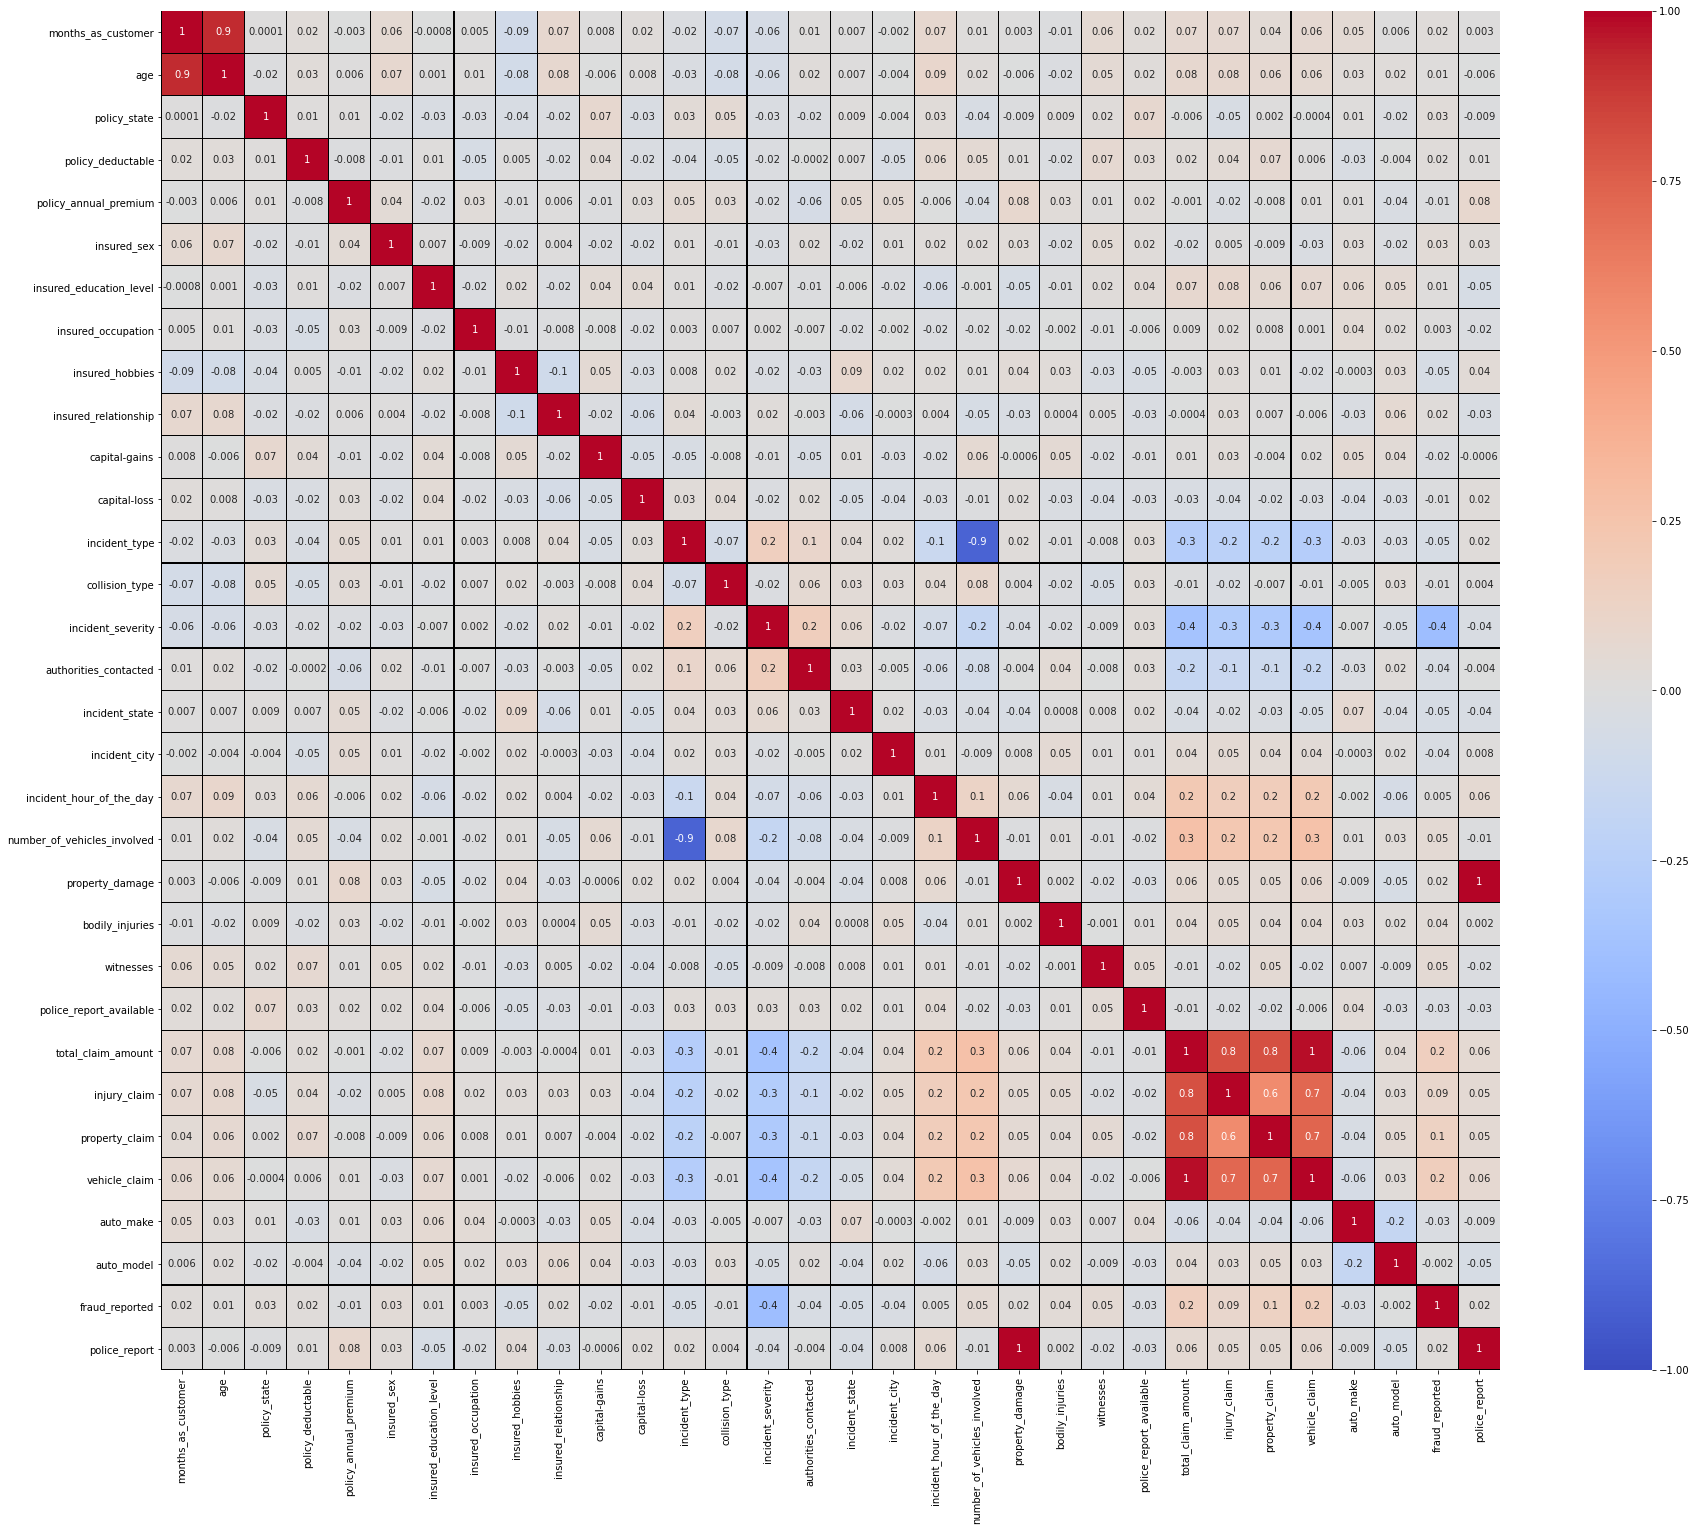

In [99]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(30,25))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

# seprating feature and labels

In [100]:
x = df_new.drop("fraud_reported",axis=1)
y = df_new["fraud_reported"]

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [102]:
x.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  insured_sex  insured_education_level  \
0                1406.91            1                        4   
1                1197.22            1                        4   
2                1413.14            0                        6   
3                1415.74            0                        6   
4                1583.91            1                        0   

   insured_occupation  insured_hobbies  insured_relationship  capital-gains  \
0                   2               17                     0          53300   
1                   6               15                     2              0   
2                  11                2                     3          35100   
3                   1                2                     4          48900   
4                  11                2                     4          66000   

   capital-loss  incident_type  collision_type  incident_severity  \
0             0              2               2                  0   
1             0              3               1                  1   
2             0              0               1                  1   
3        -62400              2               0                  0   
4        -46000              3               1                  1   

   authorities_contacted  incident_state  incident_city  \
0                      4               4              1   
1                      4               5              5   
2                      4               1              1   
3                      4               2              0   
4                      2               1              0   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                       5.0                          1.0                1   
1                       8.0                          1.0                0   
2                       7.0                          3.0                0   
3                       5.0                          1.0                0   
4                      20.0                          1.0                0   

   bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0              1.0        2.0                        2            0.716699   
1              0.0        0.0                        0           -1.781227   
2              2.0        3.0                        1           -0.720919   
3              1.0        2.0                        1            0.390994   
4              0.0        1.0                        1           -1.734214   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0        6510.0         13020.0       0.754580         10           1   
1         780.0           780.0      -1.787535          8          12   
2        7700.0          3850.0      -0.821036          4          30   
3        6340.0          6340.0       0.678438          3          34   
4        1300.0           650.0      -1.740902          0          31   

   police_report  
0              1  
1              0  
2              0  
3              0  
4              0

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features                     Features
0       6.822000           months_as_customer
1       6.841876                          age
2       1.032615                 policy_state
3       1.035862            policy_deductable
4       1.035741        policy_annual_premium
5       1.024822                  insured_sex
6       1.037578      insured_education_level
7       1.014448           insured_occupation
8       1.048059              insured_hobbies
9       1.040037         insured_relationship
10      1.032611                capital-gains
11      1.033850                 capital-loss
12      5.112824                incident_type
13      1.039143               collision_type
14      1.190473            incident_severity
15      1.069748        authorities_contacted
16      1.037930               incident_state
17      1.016536                incident_city
18      1.091710     incident_hour_of_the_day
19      5.105834  number_of_vehicles_involved
20           inf              property_damage
21      1.020046              bodily_injuries
22      1.031790                    witnesses
23      1.023826      police_report_available
24    248.162448           total_claim_amount
25     11.240172                 injury_claim
26     11.019099               property_claim
27    126.320686                vehicle_claim
28      1.065685                    auto_make
29      1.060783                   auto_model
30           inf                police_report

In [104]:
#Droping high VIF columns
X = X.drop(["total_claim_amount"],axis=1)

# Finding best accuracy and score

In [105]:
#importing necessary libraries

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = ExtraTreesClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8294314381270903  on Random_state  157


# Classification Algorithm

In [109]:
#importing necessary libraries.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Random Forest Classifer

In [110]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.7759197324414716
Confusion Matrix: [[204  23]
 [ 44  28]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       227
           1       0.55      0.39      0.46        72

    accuracy                           0.78       299
   macro avg       0.69      0.64      0.66       299
weighted avg       0.76      0.78      0.76       299



# Extra Tree Classfier

In [111]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
predet=ETC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predet))
print('Confusion Matrix:',confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

Accuracy Score: 0.7558528428093646
Confusion Matrix: [[207  20]
 [ 53  19]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       227
           1       0.49      0.26      0.34        72

    accuracy                           0.76       299
   macro avg       0.64      0.59      0.60       299
weighted avg       0.72      0.76      0.73       299



# Gradient Boosting Classifier

In [112]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.7892976588628763
Confusion Matrix: [[189  38]
 [ 25  47]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       227
           1       0.55      0.65      0.60        72

    accuracy                           0.79       299
   macro avg       0.72      0.74      0.73       299
weighted avg       0.80      0.79      0.79       299



# SVC

In [113]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.7525083612040134
Confusion Matrix: [[221   6]
 [ 68   4]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.86       227
           1       0.40      0.06      0.10        72

    accuracy                           0.75       299
   macro avg       0.58      0.51      0.48       299
weighted avg       0.68      0.75      0.67       299



# Cross validation Score

In [114]:
#Importing library

from sklearn.model_selection import cross_val_score

In [115]:
# cv score for Random Forest Classifier

print(cross_val_score(RFC,X,y,cv=5).mean())

0.7680552763819095


In [116]:
# cv score for Extra Trees Classifier

print(cross_val_score(ETC,X,y,cv=5).mean())

0.7550201005025124


In [117]:
# cv score for Gradient Boosting Classifier

print(cross_val_score(GBC,X,y,cv=5).mean())

0.8112361809045225


In [118]:
# cv score for Support vector Classifier

print(cross_val_score(SV,X,y,cv=5).mean())

0.7469849246231155


i got best score in GRADIENT BOOSTING CLASSIFIER - 81.2 %

# Hyper Parameter Tunning:

In [119]:
#importing necessary libraries

from sklearn.model_selection import GridSearchCV

In [120]:
parameter = {'criterion':['friedman_mse'],
             'max_depth': [3],
             'n_estimators':[100],
             'max_features': ['None','auto','sqrt']}

In [121]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameter,cv=5)

In [122]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [3],
                         'max_features': ['None', 'auto', 'sqrt'],
                         'n_estimators': [100]})

In [123]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 100}

In [125]:
churn_mod=GradientBoostingClassifier(criterion='friedman_mse',max_depth=3, max_features='auto', n_estimators=100)
churn_mod.fit(X_train,y_train)
pred=mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

75.58528428093646


i got 75 % score 

# Saving The model :

In [127]:
#Saving the model as .pkl file

import joblib
joblib.dump(mod,"InsuranceClaimFraud.pkl")

['InsuranceClaimFraud.pkl']

# Prediction :

In [128]:
# Loading the saved model
model=joblib.load("InsuranceClaimFraud.pkl")

#Prediction
prediction = model.predict(X_test)
prediction


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [129]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0    1    2    3    4    5    6    7    8    9    10   11   12   \
Predicted    0    0    0    0    0    0    0    0    0    0    1    0    0   
Actual       0    0    0    0    0    0    1    0    1    0    0    0    0   

           13   14   15   16   17   18   19   20   21   22   23   24   25   \
Predicted    0    0    0    0    0    0    1    0    0    1    0    0    0   
Actual       0    1    0    0    0    0    0    0    0    0    0    0    0   

           26   27   28   29   30   31   32   33   34   35   36   37   38   \
Predicted    0    0    0    0    0    0    1    0    0    0    0    0    0   
Actual       0    0    0    0    1    0    0    0    0    0    0    0    0   

           39   40   41   42   43   44   45   46   47   48   49   50   51   \
Predicted    0    0    0    0    1    0    0    0    0    0    0    0    0   
Actual       0    0    0    0    0    0    0    0    0    0    0    0    0   

           52   53   54   55   56   57   58   59   60   61   62   63   64   \
Predicted    0    0    0    0    0    0    0    0    0    0    0    0    0   
Actual       0    0    1    0    0    0    0    0    0    0    0    0    1   

           65   66   67   68   69   70   71   72   73   74   75   76   77   \
Predicted    0    0    0    0    0    0    0    0    1    0    0    0    0   
Actual       1    1    0    0    0    0    1    1    0    1    1    0    0   

           78   79   80   81   82   83   84   85   86   87   88   89   90   \
Predicted    0    0    0    1    0    0    0    0    0    0    1    0    0   
Actual       0    0    0    1    0    0    1    0    1    0    1    1    0   

           91   92   93   94   95   96   97   98   99   100  101  102  103  \
Predicted    0    0    0    0    0    0    0    0    0    0    0    0    0   
Actual       1    0    0    0    0    0    0    0    0    1    0    0    0   

           104  105  106  107  108  109  110  111  112  113  114  115  116  \
Predicted    0    0    0    0    0    0    0    0    0    0    0    0    0   
Actual       1    0    1    1    1    1    0    0    1    0    0    1    0   

           117  118  119  120  121  122  123  124  125  126  127  128  129  \
Predicted    1    0    1    0    0    0    0    0    0    1    0    0    0   
Actual       1    0    1    0    0    0    0    0    0    0    1    0    0   

           130  131  132  133  134  135  136  137  138  139  140  141  142  \
Predicted    0    0    0    0    0    0    0    0    0    0    0    0    0   
Actual       0    1    0    0    0    0    0    0    0    0    0    0    0   

           143  144  145  146  147  148  149  150  151  152  153  154  155  \
Predicted    0    0    0    0    0    0    1    0    0    0    0    1    0   
Actual       1    0    1    0    0    0    0    0    0    0    0    1    0   

           156  157  158  159  160  161  162  163  164  165  166  167  168  \
Predicted    0    0    0    1    0    0    0    0    0    0    0    0    0   
Actual       0    1    0    1    0    0    0    1    0    1    0    0    0   

           169  170  171  172  173  174  175  176  177  178  179  180  181  \
Predicted    0    0    1    0    0    0    0    0    0    0    0    0    0   
Actual       0    0    0    0    0    0    0    1    0    0    0    0    0   

           182  183  184  185  186  187  188  189  190  191  192  193  194  \
Predicted    0    0    0    0    0    0    0    0    1    0    0    0    0   
Actual       1    1    0    0    1    0    1    0    1    0    0    0    0   

           195  196  197  198  199  200  201  202  203  204  205  206  207  \
Predicted    0    0    0    0    0    0    0    0    0    0    0    0    0   
Actual       0    0    0    0    1    1    0    0    0    0    0    0    0   

           208  209  210  211  212  213  214  215  216  217  218  219  220  \
Predicted    0    1    0    0    0    0    0    1    0    0    0    0    0   
Actual       0    0    1    0    0    0    0    0    0    0    0    0    1   

           221  

# here we can see predict and actual are looking similar

# THANK YOU....